In [5]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.graphics.tsaplots as sgt
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
raw_csv_data = pd.read_csv('013 IndexE81.csv')
df_comp = raw_csv_data.copy()
#Converting Time
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
#Setting Date as an index
df_comp.set_index('date', inplace=True)
#Setting Frequency as business working days
df_comp = df_comp.asfreq('b')
#Filling the Missing or Empty Values
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse

In [3]:
#Splitting Data into train and test
size = int(len(df_comp)*0.8)
df, df_test = df_comp[size:], df_comp[:size]

In [4]:
df.count()

spx             1256
dax             1256
ftse            1256
nikkei          1256
market_value    1256
dtype: int64

In [6]:
#ARIMA(1,1,1)
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
print(results_ar_1_i_1_ma_1.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6799.179
Method:                       css-mle   S.D. of innovations             54.529
Date:                Sat, 27 Mar 2021   AIC                          13606.359
Time:                        21:45:03   BIC                          13626.898
Sample:                    04-09-2013   HQIC                         13614.079
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1121      1.582      0.703      0.482      -1.988       4.213
ar.L1.D.market_value    -0.7720      0.145     -5.318      0.000      -1.057      -0.487
ma.L1.D.mark

<ipython-input-8-e1dfe71d450c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid


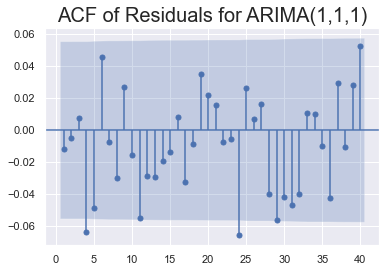

In [8]:
#Residuals of ARMA(1,1,1)
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero=False, lags=40)
plt.title('ACF of Residuals for ARIMA(1,1,1)', size = 20)
plt.show()

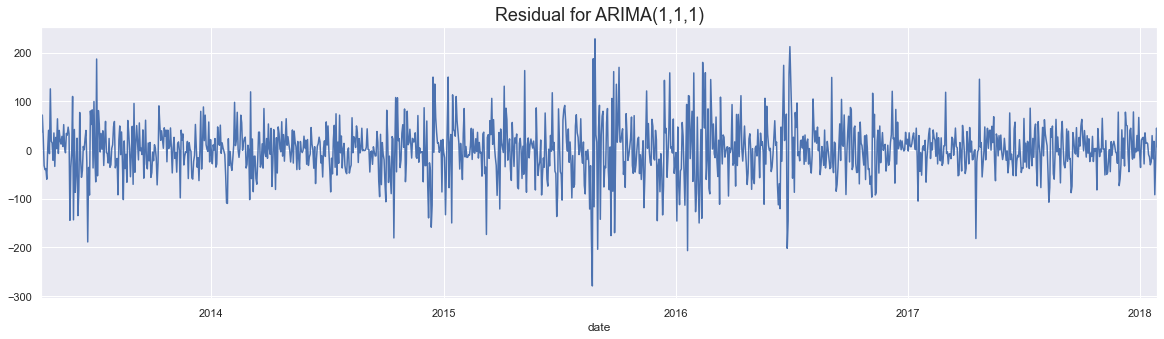

In [11]:
df.res_ar_1_i_1_ma_1[1:].plot(figsize=(20,5))
plt.title('Residual for ARIMA(1,1,1)', size=18)
plt.show()

In [13]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(2,1,1)
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
print(results_ar_2_i_1_ma_1.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -6798.919
Method:                       css-mle   S.D. of innovations             54.517
Date:                Sat, 27 Mar 2021   AIC                          13607.838
Time:                        21:58:11   BIC                          13633.512
Sample:                    04-09-2013   HQIC                         13617.488
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1106      1.549      0.717      0.473      -1.926       4.147
ar.L1.D.market_value    -0.7056      0.177     -3.976      0.000      -1.053      -0.358
ar.L2.D.mark

In [15]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(2,1,2)
model_ar_2_i_1_ma_2 = ARIMA(df.market_value, order=(2,1,2))
results_ar_2_i_1_ma_2 = model_ar_2_i_1_ma_2.fit()
print(results_ar_2_i_1_ma_2.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6794.666
Method:                       css-mle   S.D. of innovations             54.331
Date:                Sat, 27 Mar 2021   AIC                          13601.331
Time:                        21:59:17   BIC                          13632.141
Sample:                    04-09-2013   HQIC                         13612.911
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0396      0.862      1.206      0.228      -0.650       2.729
ar.L1.D.market_value     0.2105      0.148      1.418      0.156      -0.080       0.501
ar.L2.D.mark

In [16]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(1,1,2)
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
print(results_ar_1_i_1_ma_2.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -6798.932
Method:                       css-mle   S.D. of innovations             54.518
Date:                Sat, 27 Mar 2021   AIC                          13607.865
Time:                        22:00:20   BIC                          13633.539
Sample:                    04-09-2013   HQIC                         13617.515
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1104      1.550      0.716      0.474      -1.927       4.148
ar.L1.D.market_value    -0.6785      0.201     -3.370      0.001      -1.073      -0.284
ma.L1.D.mark

In [17]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(1,1,3)
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
print(results_ar_1_i_1_ma_3.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -6798.739
Method:                       css-mle   S.D. of innovations             54.510
Date:                Sat, 27 Mar 2021   AIC                          13609.479
Time:                        22:01:28   BIC                          13640.288
Sample:                    04-09-2013   HQIC                         13621.059
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1132      1.584      0.703      0.482      -1.992       4.218
ar.L1.D.market_value    -0.5428      0.287     -1.889      0.059      -1.106       0.020
ma.L1.D.mark

In [18]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(2,1,1)
model_ar_2_i_1_ma_2 = ARIMA(df.market_value, order=(2,1,2))
results_ar_2_i_1_ma_2 = model_ar_2_i_1_ma_2.fit()
print(results_ar_2_i_1_ma_2.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6794.666
Method:                       css-mle   S.D. of innovations             54.331
Date:                Sun, 28 Mar 2021   AIC                          13601.331
Time:                        17:46:04   BIC                          13632.141
Sample:                    04-09-2013   HQIC                         13612.911
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0396      0.862      1.206      0.228      -0.650       2.729
ar.L1.D.market_value     0.2105      0.148      1.418      0.156      -0.080       0.501
ar.L2.D.mark

In [19]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(1,1,3)
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
print(results_ar_1_i_1_ma_3.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -6798.739
Method:                       css-mle   S.D. of innovations             54.510
Date:                Sun, 28 Mar 2021   AIC                          13609.479
Time:                        21:10:51   BIC                          13640.288
Sample:                    04-09-2013   HQIC                         13621.059
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1132      1.584      0.703      0.482      -1.992       4.218
ar.L1.D.market_value    -0.5428      0.287     -1.889      0.059      -1.106       0.020
ma.L1.D.mark

In [20]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(2,1,2)
model_ar_2_i_1_ma_2 = ARIMA(df.market_value, order=(2,1,2))
results_ar_2_i_1_ma_2 = model_ar_2_i_1_ma_2.fit()
print(results_ar_2_i_1_ma_2.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6794.666
Method:                       css-mle   S.D. of innovations             54.331
Date:                Sun, 28 Mar 2021   AIC                          13601.331
Time:                        21:11:42   BIC                          13632.141
Sample:                    04-09-2013   HQIC                         13612.911
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0396      0.862      1.206      0.228      -0.650       2.729
ar.L1.D.market_value     0.2105      0.148      1.418      0.156      -0.080       0.501
ar.L2.D.mark

In [22]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(2,1,4)
model_ar_2_i_1_ma_4 = ARIMA(df.market_value, order=(2,1,4))
results_ar_2_i_1_ma_4 = model_ar_2_i_1_ma_4.fit()
print(results_ar_2_i_1_ma_4.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -6794.061
Method:                       css-mle   S.D. of innovations             54.306
Date:                Sun, 28 Mar 2021   AIC                          13604.122
Time:                        21:12:45   BIC                          13645.201
Sample:                    04-09-2013   HQIC                         13619.562
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1092      1.495      0.742      0.458      -1.822       4.040
ar.L1.D.market_value    -0.1798      0.366     -0.491      0.623      -0.897       0.538
ar.L2.D.mark

In [23]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(3,1,1)
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
print(results_ar_3_i_1_ma_1.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -6798.688
Method:                       css-mle   S.D. of innovations             54.507
Date:                Sun, 28 Mar 2021   AIC                          13609.375
Time:                        21:13:32   BIC                          13640.185
Sample:                    04-09-2013   HQIC                         13620.955
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1132      1.582      0.704      0.482      -1.987       4.213
ar.L1.D.market_value    -0.5599      0.296     -1.889      0.059      -1.141       0.021
ar.L2.D.mark

In [24]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(1,1,4)
model_ar_1_i_1_ma_4 = ARIMA(df.market_value, order=(1,1,4))
results_ar_1_i_1_ma_4 = model_ar_1_i_1_ma_4.fit()
print(results_ar_1_i_1_ma_4.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(1, 1, 4)   Log Likelihood               -6794.987
Method:                       css-mle   S.D. of innovations             54.346
Date:                Sun, 28 Mar 2021   AIC                          13603.974
Time:                        21:14:35   BIC                          13639.918
Sample:                    04-09-2013   HQIC                         13617.484
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1099      1.394      0.796      0.426      -1.622       3.842
ar.L1.D.market_value     0.2243      0.272      0.825      0.409      -0.308       0.757
ma.L1.D.mark

In [25]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(4,1,1)
model_ar_4_i_1_ma_1 = ARIMA(df.market_value, order=(4,1,1))
results_ar_4_i_1_ma_1 = model_ar_4_i_1_ma_1.fit()
print(results_ar_4_i_1_ma_1.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -6794.951
Method:                       css-mle   S.D. of innovations             54.345
Date:                Sun, 28 Mar 2021   AIC                          13603.902
Time:                        21:15:40   BIC                          13639.846
Sample:                    04-09-2013   HQIC                         13617.412
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1090      1.420      0.781      0.435      -1.674       3.892
ar.L1.D.market_value     0.2084      0.236      0.883      0.377      -0.254       0.671
ar.L2.D.mark

In [26]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(3,1,2)
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit()
print(results_ar_3_i_1_ma_2.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -6795.805
Method:                       css-mle   S.D. of innovations             54.381
Date:                Sun, 28 Mar 2021   AIC                          13605.610
Time:                        21:16:43   BIC                          13641.554
Sample:                    04-09-2013   HQIC                         13619.120
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1184      1.630      0.686      0.493      -2.076       4.313
ar.L1.D.market_value    -0.5878      0.131     -4.495      0.000      -0.844      -0.332
ar.L2.D.mark

In [27]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(4,1,3)
model_ar_4_i_1_ma_3 = ARIMA(df.market_value, order=(4,1,3))
results_ar_4_i_1_ma_3 = model_ar_4_i_1_ma_3.fit()
print(results_ar_4_i_1_ma_3.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -6789.793
Method:                       css-mle   S.D. of innovations             54.119
Date:                Sun, 28 Mar 2021   AIC                          13597.585
Time:                        21:19:11   BIC                          13643.799
Sample:                    04-09-2013   HQIC                         13614.955
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0470      0.865      1.210      0.226      -0.649       2.743
ar.L1.D.market_value     0.4075      0.111      3.669      0.000       0.190       0.625
ar.L2.D.mark

In [28]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(4,1,2)
model_ar_4_i_1_ma_2 = ARIMA(df.market_value, order=(4,1,2))
results_ar_4_i_1_ma_2 = model_ar_4_i_1_ma_2.fit()
print(results_ar_4_i_1_ma_2.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -6793.673
Method:                       css-mle   S.D. of innovations             54.289
Date:                Sun, 28 Mar 2021   AIC                          13603.346
Time:                        21:22:03   BIC                          13644.425
Sample:                    04-09-2013   HQIC                         13618.786
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1105      1.534      0.724      0.469      -1.895       4.116
ar.L1.D.market_value    -0.3916      0.291     -1.347      0.178      -0.962       0.178
ar.L2.D.mark

In [29]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(3,1,4)
model_ar_3_i_1_ma_4 = ARIMA(df.market_value, order=(4,1,3))
results_ar_3_i_1_ma_4 = model_ar_3_i_1_ma_4.fit()
print(results_ar_3_i_1_ma_4.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -6789.793
Method:                       css-mle   S.D. of innovations             54.119
Date:                Sun, 28 Mar 2021   AIC                          13597.585
Time:                        21:23:29   BIC                          13643.799
Sample:                    04-09-2013   HQIC                         13614.955
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0470      0.865      1.210      0.226      -0.649       2.743
ar.L1.D.market_value     0.4075      0.111      3.669      0.000       0.190       0.625
ar.L2.D.mark

In [30]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(3,1,3)
model_ar_3_i_1_ma_3 = ARIMA(df.market_value, order=(3,1,3))
results_ar_3_i_1_ma_3 = model_ar_3_i_1_ma_3.fit()
print(results_ar_3_i_1_ma_3.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -6794.060
Method:                       css-mle   S.D. of innovations             54.305
Date:                Sun, 28 Mar 2021   AIC                          13604.120
Time:                        21:24:59   BIC                          13645.199
Sample:                    04-09-2013   HQIC                         13619.560
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1142      1.589      0.701      0.483      -2.000       4.229
ar.L1.D.market_value    -1.1038      0.261     -4.222      0.000      -1.616      -0.591
ar.L2.D.mark

In [31]:
#ARIMA(1,1,1) -> ARIMA(4,1,4)
#ARIMA(2,1,2)
model_ar_2_i_1_ma_2 = ARIMA(df.market_value, order=(2,1,2))
results_ar_2_i_1_ma_2 = model_ar_2_i_1_ma_2.fit()
print(results_ar_2_i_1_ma_2.summary())

C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\AGO DUAPA FURNITURES\anaconda4\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6794.666
Method:                       css-mle   S.D. of innovations             54.331
Date:                Sun, 28 Mar 2021   AIC                          13601.331
Time:                        21:26:07   BIC                          13632.141
Sample:                    04-09-2013   HQIC                         13612.911
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0396      0.862      1.206      0.228      -0.650       2.729
ar.L1.D.market_value     0.2105      0.148      1.418      0.156      -0.080       0.501
ar.L2.D.mark

In [38]:
#(4,1,1),(4,1,3),(3,1,4),(3,1,3)
print('\tARIMA(4,1,1): \tLLR = ', results_ar_4_i_1_ma_1.llf, '\tAIC = ', results_ar_4_i_1_ma_1.aic)
print('\tARIMA(3,1,4): \tLLR = ', results_ar_3_i_1_ma_4.llf, '\tAIC = ', results_ar_3_i_1_ma_4.aic)
print('\tARIMA(4,1,3): \tLLR = ', results_ar_4_i_1_ma_3.llf, '\tAIC = ', results_ar_4_i_1_ma_3.aic)
print('\tARIMA(3,1,3): \tLLR = ', results_ar_3_i_1_ma_3.llf, '\tAIC = ', results_ar_3_i_1_ma_3.aic)
print('\tARIMA(3,1,2): \tLLR = ', results_ar_3_i_1_ma_2.llf, '\tAIC = ', results_ar_3_i_1_ma_2.aic)

	ARIMA(4,1,1): 	LLR =  -6794.950932533343 	AIC =  13603.901865066686
	ARIMA(3,1,4): 	LLR =  -6789.79271775756 	AIC =  13597.58543551512
	ARIMA(4,1,3): 	LLR =  -6789.79271775756 	AIC =  13597.58543551512
	ARIMA(3,1,3): 	LLR =  -6794.059982609471 	AIC =  13604.119965218943
	ARIMA(3,1,2): 	LLR =  -6795.804915364027 	AIC =  13605.609830728054


In [39]:
print(results_ar_3_i_1_ma_2.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 1255
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -6795.805
Method:                       css-mle   S.D. of innovations             54.381
Date:                Sun, 28 Mar 2021   AIC                          13605.610
Time:                        22:01:33   BIC                          13641.554
Sample:                    04-09-2013   HQIC                         13619.120
                         - 01-29-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1184      1.630      0.686      0.493      -2.076       4.313
ar.L1.D.market_value    -0.5878      0.131     -4.495      0.000      -0.844      -0.332
ar.L2.D.mark

In [41]:
df['results_ar_3_i_1_ma_2'] = results_ar_3_i_1_ma_2.resid

<ipython-input-41-74758fa0f0f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['results_ar_3_i_1_ma_2'] = results_ar_3_i_1_ma_2.resid


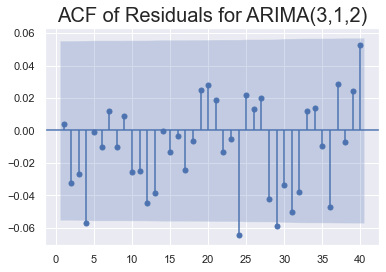

In [42]:
sgt.plot_acf(df.results_ar_3_i_1_ma_2[1:], zero=False, lags=40)
plt.title('ACF of Residuals for ARIMA(3,1,2)', size = 20)
plt.show()